In [50]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [51]:
# %pip install -r requirements.txt

In [52]:
# =================================================-
#### Slide 5/24: Load packages  ####

# Helper packages.
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pathlib import Path

# Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

In [53]:
# =================================================-
#### Slide 6/24: Directory settings  ####

# Set 'main_dir' to location of the project folder
data_dir = Path.cwd() / "data"

In [54]:
data_dir

WindowsPath('C:/Users/91987/Desktop/LEARNING FOLDER/Machine Learning A-Z/April_Text_Mining_Bootcamp/Text-Mining-main/data')

In [55]:
# =================================================-
#### Slide 8/24: Download NLTK resources  ####

# Command to download resources from NLTK package.

# !python -m nltk.downloader stopwords punkt

nltk.download(["punkt", "stopwords"])
# Uncomment above command to download,
# Once successfully downloaded, comment it back to avoid repetitive download trials

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91987\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91987\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Get common English stop words.
stop_words = stopwords.words("english")

In [57]:
data_dir

WindowsPath('C:/Users/91987/Desktop/LEARNING FOLDER/Machine Learning A-Z/April_Text_Mining_Bootcamp/Text-Mining-main/data')

In [58]:
# =================================================-
#### Slide 11/24: Load text data  ####

df = pd.read_csv("data/NYT_article_data.csv")
print(df.columns)
# Look at the columns.
print(df["snippet"].head())

Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date', 'id'],
      dtype='object')
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [59]:
# =================================================-
#### Slide 12/24: Drop missing data  ####

# Not needed, because there are no missing data

# Print total number of NAs.
# print(df["snippet"].isna().sum())
# Drop NAs if any.
# df = df.dropna(subset=["snippet"]).reset_index(drop=True)
# print(df["snippet"].isna().sum())

In [60]:
# =================================================-
#### Slide 14/24: Create a series of documents  ####

# Isolate the `snippet` column.
df_text = df["snippet"]
print(type(df_text))
# Look at a sample of the `snippet` column, 0-5.
print(df_text[:5])


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

<class 'pandas.core.series.Series'>
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [61]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [62]:
df_text

0      Nick Kyrgios started his Brisbane Open title d...
1      British police confirmed on Tuesday they were ...
2      Marcellus Wiley is still on the fence about le...
3      Still reckoning with the fallout from her Emme...
4      As far as Arike Ogunbowale and coach Muffet Mc...
                             ...                        
228    Two regions of Belgium are banning kosher and ...
229    The couple met in 2013 through a mutual friend...
230    Zimbabwe's president has more than doubled the...
231    The European Union should consider regulating ...
232    The risk of the British parliament seeking to ...
Name: snippet, Length: 233, dtype: object

In [63]:
df_text.isna().sum()

0

In [64]:
# =================================================-
#### Slide 4/27: Tokenization: split each document into words  ####

# Not needed, because there are no missing data

# Before we start tokenizing, it is important to check for NAs and drop them
# df_text = df_text.dropna().reset_index(drop=True)

In [65]:
# Tokenize each document into a large list of tokenized documents.
df_tokenized = df_text.apply(word_tokenize)

In [66]:
df_tokenized

0      [Nick, Kyrgios, started, his, Brisbane, Open, ...
1      [British, police, confirmed, on, Tuesday, they...
2      [Marcellus, Wiley, is, still, on, the, fence, ...
3      [Still, reckoning, with, the, fallout, from, h...
4      [As, far, as, Arike, Ogunbowale, and, coach, M...
                             ...                        
228    [Two, regions, of, Belgium, are, banning, kosh...
229    [The, couple, met, in, 2013, through, a, mutua...
230    [Zimbabwe, 's, president, has, more, than, dou...
231    [The, European, Union, should, consider, regul...
232    [The, risk, of, the, British, parliament, seek...
Name: snippet, Length: 233, dtype: object

In [67]:
# =================================================-
#### Slide 5/27: Save the first tokenized document  ####

# Let's take a look at the first tokenized document
document_words = df_tokenized[0]
print(document_words)

['Nick', 'Kyrgios', 'started', 'his', 'Brisbane', 'Open', 'title', 'defense', 'with', 'a', 'battling', '7-6', '(', '5', ')', '5-7', '7-6', '(', '5', ')', 'victory', 'over', 'American', 'Ryan', 'Harrison', 'in', 'the', 'opening', 'round', 'on', 'Tuesday', '.']


In [68]:
# =================================================-
#### Slide 7/27: Convert characters to lowercase  ####

# 1. Convert to lowercase.
document_words = [word.lower() for word in document_words]
print(document_words[:10])

['nick', 'kyrgios', 'started', 'his', 'brisbane', 'open', 'title', 'defense', 'with', 'a']


In [69]:
# =================================================-
#### Slide 9/27: Remove stop words  ####

# 2. Remove stop words.
# Get common English stop words.
stop_words = stopwords.words("english")
print(stop_words[:10])
# Remove stop words.
document_words = [word for word in document_words if not word in stop_words]
print(document_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', '7-6', '(']


In [70]:
# =================================================-
#### Slide 11/27: Remove non-alphabetical characters  ####

# 3. Remove punctuation and any non-alphabetical characters.
document_words = [word for word in document_words if word.isalpha()]
print(document_words[:10])

['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', 'victory', 'american']


In [71]:
# =================================================-
#### Slide 15/27: Stem words  ####

# 4. Stem words.
document_words = [PorterStemmer().stem(word) for word in document_words]
print(document_words[:10])

['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']


In [72]:
# =================================================-
#### Slide 17/27: Implement pre-processing steps on a corpus  ####

processed_texts = [
    [
        PorterStemmer().stem(word.lower())
        for word in word_tokenize(text)
        if not word.lower() in stop_words
        if word.isalpha()
    ]
    for text in df_text
]

In [73]:
word_counts = [len(text) for text in processed_texts]

In [74]:
print(processed_texts[:3])

[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi'], ['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de']]


In [75]:
word_counts[:3]

[15, 22, 27]

In [76]:
# =================================================-
#### Slide 18/27: Inspect results  ####

print(processed_texts[0][:10])
print(processed_texts[5][:10])
print(processed_texts[10][:10])
print(processed_texts[15][:10])
print(processed_texts[20][:10])

['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']
['prohibit', 'vacat', 'rental', 'arrang', 'onlin', 'airbnb', 'move', 'closer', 'realiti', 'thursday']
['labor', 'movement', 'press', 'govern', 'get', 'feder', 'employe', 'back', 'work', 'highlight']
['william', 'seed', 'may', 'match', 'simona', 'halep', 'perhap', 'sister', 'venu', 'melbourn']
['epiphani', 'celebr', 'bring', 'togeth', 'hundr', 'peopl', 'romanian', 'villag', 'pietrosani', 'day']


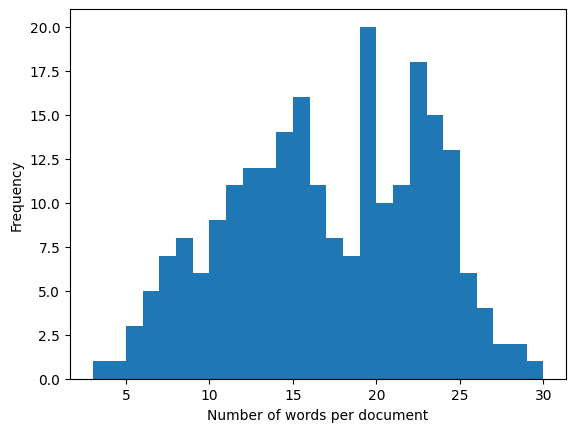

In [77]:
# =================================================-
#### Slide 19/27: Remove empty and very short documents  ####

# Let's take a look at total word counts per document (for the first 10).
# print(word_counts[:10])
# Plot a histogram for word counts per document, set bins to number of unique values in the list.
plt.hist(word_counts, bins=len(set(word_counts)))
plt.xlabel("Number of words per document")
plt.ylabel("Frequency");

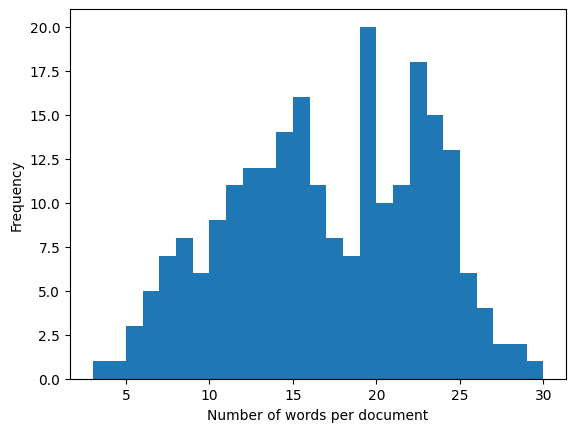

In [78]:
pd.Series(word_counts).plot.hist(
    grid=False, 
    xlabel="Number of words per document", 
    ylabel="Frequency",
    bins=len(set(word_counts)),
);

In [79]:
# =================================================-
#### Slide 20/27: Remove empty and very short documents (cont'd)  ####

# Convert word counts list and documents list to NumPy arrays.
word_counts_array = np.array(word_counts)
df_array = np.array(processed_texts, dtype=object)
len(df_array)

233

In [80]:
# Find indices of all documents where there are greater than or equal to 5 words.
valid_documents = np.where(word_counts_array >= 5)[0]
len(valid_documents)

231

In [81]:
mask = np.where(word_counts_array >= 5, True, False)

In [82]:
df_array[~mask]

array([list(['fli', 'cours', 'sometim']),
       list(['need', 'know', 'end', 'day'])], dtype=object)

In [83]:
# =================================================-
#### Slide 21/27: Remove empty and very short documents (cont'd)  ####

# Subset the df_array to keep only those where there are at least 5 words.
df_array = df_array[valid_documents]
print(len(df_array))
df_clean = df_array.tolist()  # Convert the array back to a list.
print(df_clean[:5])

231
[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi'], ['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de'], ['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi', 'chang', 'even', 'move', 'forward', 'new', 'galleri', 'show'], ['far', 'arik', 'ogunbowal', 'coach', 'muffet', 'mcgraw', 'concern', 'notr', 'dame', 'victori', 'louisvil', 'thursday', 'night', 'anoth', 'atlant', 'coast', 'confer', 'game', 'januari']]


In [84]:
# =================================================-
#### Slide 22/27: .join() function  ####

# Here is a simple example of the `.join()` function in action!
numList = ["1", "2", "3", "4"]
", ".join(numList)

'1, 2, 3, 4'

In [85]:
# =================================================-
#### Slide 23/27: Save processed text to file using .join()  ####

# Join words in each document into a single character string.
df_clean_list = [" ".join(document) for document in df_clean]
print(df_clean_list[:2])

# Create a function that takes a list of character strings
# and a name of an output file and writes it into a txt file.
Path("data/clean_df.txt").write_text("\n".join(df_clean_list))


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday', 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi']


25007

In [86]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [87]:
# =================================================-
#### Slide 6/22: Create a DTM  ####

# Initialize `CountVectorizer`.
vec = CountVectorizer(ngram_range=(1, 3))
# Transform the list of documents clean documents `df_clean_list` into DTM.
X = vec.fit_transform(df_clean_list)
print(X.toarray())  # <- to show output as a matrix
print(vec.get_feature_names_out()[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['abduct' 'abduct led' 'abduct led investig' 'abl' 'abl meet'
 'abl meet childhood' 'abo' 'abo long' 'abo long histori' 'absente']


In [88]:
# =================================================-
#### Slide 7/22: Create a DTM (cont'd)  ####

# Convert the matrix into a Pandas DataFrame for easier manipulation.
DTM = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
DTM.head()

,abduct,abduct led,abduct led investig,abl,abl meet,abl meet childhood,abo,abo long,abo long histori,absente,...,young women color,yuan,yuan rather,yuan rather dollar,zimbabw,zimbabw presid,zimbabw presid doubl,zykera,zykera rice,zykera rice ad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# =================================================-
#### Slide 8/22: DTM to dictionary of total word counts  ####


# Create a convenience function that sorts and looks at first n-entries in the dictionary.
# def head_dict(dict_x, n):
#     # Get items from the dictionary and sort them by
#     # value key in descending (i.e. reverse) order
#     sorted_x = sorted(dict_x.items(), reverse=True, key=lambda kv: kv[1])

#     # Convert sorted dictionary to a list.
#     dict_x_list = list(sorted_x)

#     # Return the first `n` values from the dictionary only.
#     return dict(dict_x_list[:n])

In [90]:
# =================================================-
#### Slide 9/22: DTM to dictionary of total word counts (cont'd)  ####

# Sum frequencies of each word in all documents.
# DTM.sum(axis=0).head()
# Save series as a dictionary.
# corpus_freq_dist = DTM.sum(axis=0).to_dict()
# Glance at the frequencies.
# print(HeadDict(corpus_freq_dist, 6))

In [91]:
# =================================================-
#### Slide 12/22: Plot distribution of words in document corpus  ####


In [92]:
# Plot distribution for the entire corpus.

word_freq = pd.Series(dict(sorted(
        DTM.sum().to_dict().items(),
        reverse=True,
        key=lambda kv: kv[1],
)))

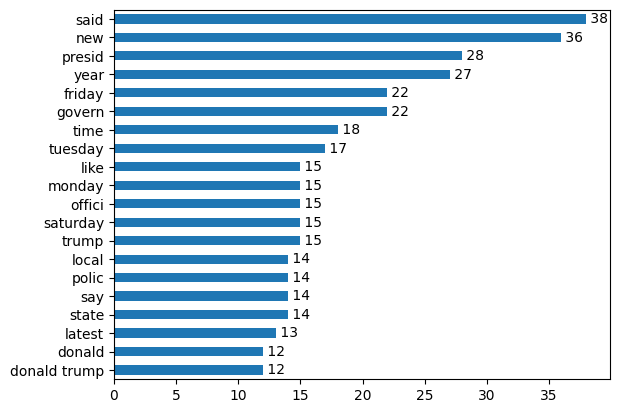

In [93]:
ax = word_freq.head(20).sort_values(ascending=True).plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt=" %.0f")

In [94]:
# =================================================-
#### Slide 15/22: Visualizing words using n-grams  ####

# from nltk.util import ngrams

# print(df_clean_list[0])
# word = df_clean_list[0].split()
# print(list(ngrams(word, 2)))  # <- set value of n as 2
# print(list(ngrams(word, 3)))  # <- set value of n as 3

In [95]:
# =================================================-
#### Slide 16/22: Convenience function to generate n-grams  ####

# def generate_ngrams(df_clean_list):
#     for i in range(len(df_clean_list)):
#         for n in range(2, 4):
#             n_grams = ngrams(df_clean_list[i].split(), n)
#             for grams in n_grams:
#                 print(grams)
# generate_ngrams(df_clean_list[0:10])

(-0.5, 399.5, 199.5, -0.5)

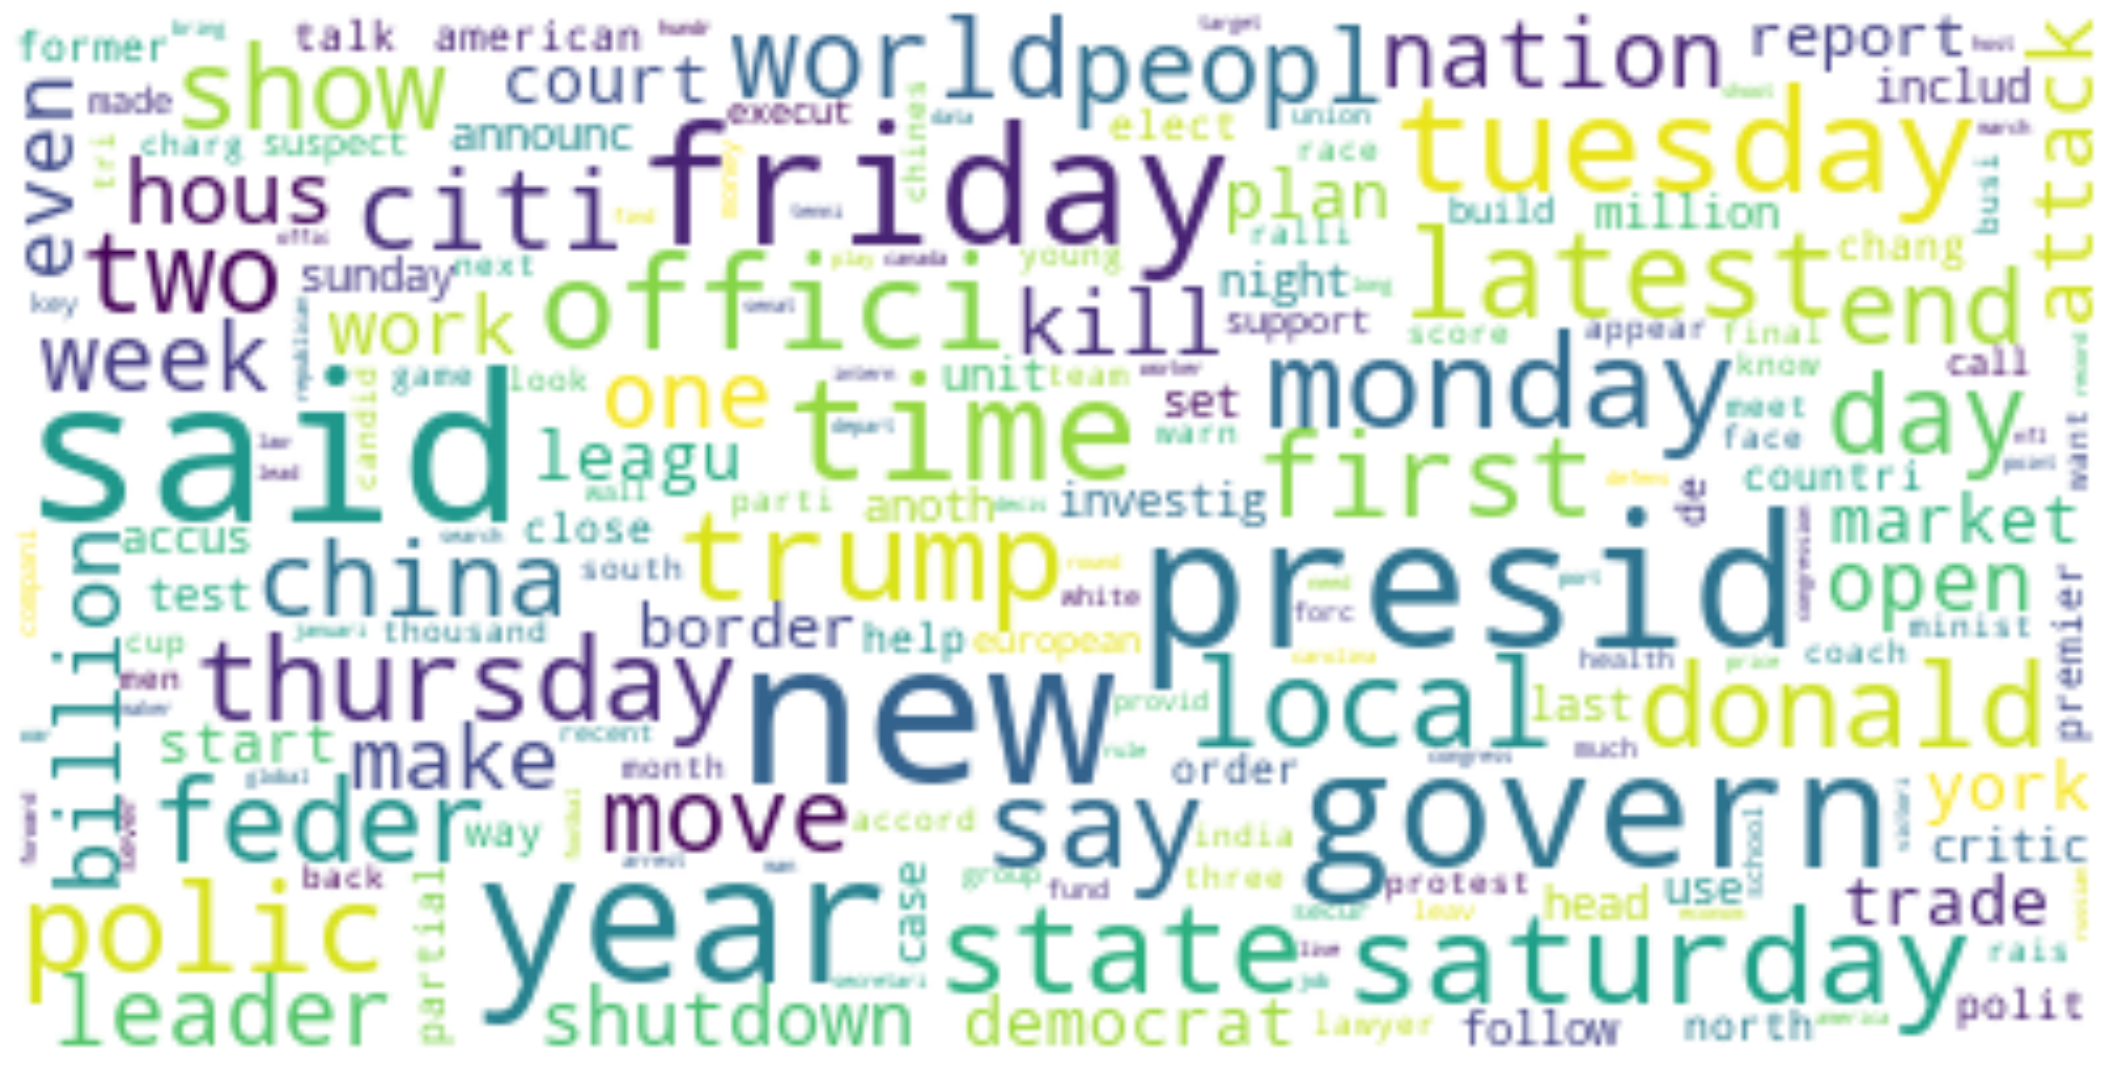

In [96]:
# =================================================-
#### Slide 17/22: Visualizing word counts with word clouds  ####

# Construct a word cloud from corpus.
wordcloud = WordCloud(max_font_size=40, background_color="white", collocations=False)
wordcloud = wordcloud.generate(" ".join(df_clean_list))
plt.figure(figsize=(27, 20))  # Plot the cloud using matplotlib.
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [97]:
# =================================================-
#### Slide 19/22: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################